# 3. Machine Learning for Classification

3.1 Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn

## 3.2 Data preparation
* download the data, read it with pandas
* look at the data
* make column names and values look uniform
* check if all the columns read correctly
* check if the churn variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# uniform the columns names and values

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [5]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
# column totalcharges must be a number but it is set as an object
# we will convert to number
# errors=coerce -> like ignore

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [8]:
# analyze if there is missing values

df.totalcharges = df.totalcharges.fillna(0)

In [9]:
df.totalcharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [10]:
# for machine learning, column churn must be in 1 or 0

df.churn = (df.churn == 'yes').astype(int)

## 3.3 Setting up the validation framework

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# we split in df_full_train and df_test

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [13]:
len(df_full_train), len(df_test)

(5634, 1409)

In [14]:
# now, we need to split in df_train and df_val, but test_size must be 0.25 
# so we can get df_train = 60%, df_val = 20% and df_test = 20%

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [16]:
# reset the index

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [18]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

In [19]:
df_full_train = df_full_train.reset_index(drop=True)

In [20]:
# looking for missing data

df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [21]:
# distribution of churn variable

df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [22]:
# mean = number of ones / n = churn rate

global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [23]:
# type of variables
# we are insterested in 3 numerical variables (tenure, monthlycharges, totalcharges)

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [24]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [25]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [26]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

Churn rate

In [29]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [30]:
# we can look into different groups, for example gender

churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [31]:
global_churn - churn_female

-0.006855983216553063

In [32]:
# male

churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [33]:
global_churn - churn_male

0.006754520462819769

In [34]:
# partner

df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [35]:
# looks like significant difference from global churn

churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [36]:
global_churn - churn_partner

0.06493474245795922

In [37]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [38]:
global_churn - churn_no_partner

-0.05984095297455855

It seems like doesn´t matter the gender, partner variable is more important to predict churn

difference between global churn and group churn (eg: partner):

* '>0' , seems less likely to churn
* '<0' , seems more likely to churn

### Risk ratio - tell us in relative term

risk = group / global
* '>1', more likely to churn
* '<1', less likely to churn

In [39]:
# risk ratio
# 22,16% greater

churn_no_partner / global_churn

1.2216593879412643

In [40]:
# 24,05%  lower

churn_partner / global_churn

0.7594724924338315

We can implement a code like this in SQL:

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [41]:
# because the loop doesn´t display, we need to use a function to display thinks (Ipython)

from IPython.display import display

In [43]:
# in Pandas with analysis of all categorical variables

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = global_churn - df_group['mean']
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,-0.006856,1.025396
male,0.263214,2838,0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,0.027698,0.897403
1,0.413377,912,-0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,-0.059841,1.221659
yes,0.205033,2702,0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,-0.043792,1.162212
yes,0.165666,1666,0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,0.028652,0.893870
yes,0.273049,5087,-0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,0.012561,0.953474
no_phone_service,0.241316,547,0.028652,0.893870
yes,0.290742,2387,-0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,0.077621,0.712482
fiber_optic,0.425171,2479,-0.155203,1.574895
no,0.077805,1221,0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,-0.150953,1.559152
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.153226,1612,0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,-0.134355,1.497672
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.217232,1915,0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,-0.125907,1.466379
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.230412,1940,0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,-0.148946,1.551717
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.159926,1632,0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,-0.072864,1.269897
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.302723,2167,-0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,-0.068938,1.255358
no_internet_service,0.077805,1221,0.192163,0.288201
yes,0.307273,2200,-0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,-0.161733,1.599082
one_year,0.120573,1186,0.149395,0.446621
two_year,0.028274,1344,0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,0.097897,0.637375
yes,0.338151,3321,-0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,0.101797,0.622928
credit_card_(automatic),0.164339,1217,0.105630,0.608733
electronic_check,0.455890,1893,-0.185922,1.688682
mailed_check,0.193870,1305,0.076098,0.718121


## 3.6 Feature importance: Mutual information

Concept from information theory, it tells us how much we can learn about one variable if we know the value of another

In [44]:
# we use sklearn

from sklearn.metrics import mutual_info_score

In [45]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [46]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [47]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [48]:
# lets define a function that we can use with 'apply'

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)


In [49]:
# apply to all categorical variables, ordered

mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

We can see which variables are more valuable

## 3.7 Feature importance: Correlation

How about numerical columns?
* Correlation coefficient (Pearson correlation coefficient)

In [51]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [52]:
# tenure <= 2 months

df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [53]:
# tenure between 2 and 12 months

df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <=12)].churn.mean()

0.3994413407821229

In [54]:
# tenure > 12 months

df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [55]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [56]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <=50)].churn.mean()

0.18340943683409436

In [58]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

## 3.8 One-hot encoding (transform each value in binary)
Use Scikit-Learn to encode categorical features

In [59]:
from sklearn.feature_extraction import DictVectorizer

In [73]:
# put the categorical and numerical variables in a dictionary

train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [74]:
dv = DictVectorizer(sparse=False)

In [75]:
# fit the dictionaries that we will use for train

X_train = dv.fit_transform(train_dicts)

In [76]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [77]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [78]:
X_val = dv.transform(val_dicts)

## 3.9 Logistic regression
* Binary classification
* Linear vs logistic regression

In [79]:
# sigmoid

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [84]:
z  = np.linspace(-7, 7, 51)

In [85]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

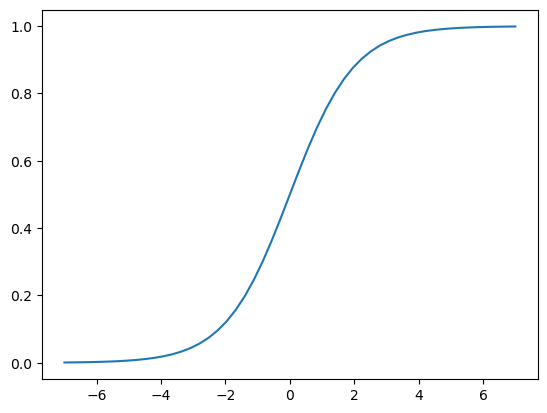

In [86]:
plt.plot(z, sigmoid(z))

In [87]:
# linear regression

def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [88]:
# logistic regression

def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn
* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
# using the data created in hot-enconding part

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [91]:
model.intercept_[0]

-0.10902839901367514

In [92]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [93]:
# hard predictions (churn, not churn)

model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [94]:
# soft predictions (probability of not churn , probability of churn)

model.predict_proba(X_train)

array([[0.90454202, 0.09545798],
       [0.320647  , 0.679353  ],
       [0.36630041, 0.63369959],
       ...,
       [0.46839904, 0.53160096],
       [0.95745244, 0.04254756],
       [0.30123691, 0.69876309]])

In [95]:
# we are interested only in probability of churn
# we decide above each threshold we treat people as churning (0.5)

y_pred = model.predict_proba(X_val)[:, 1]

In [97]:
# with this decision, we can sending promotional email to try to avoid churn

churn_decision = (y_pred >= 0.5)

In [98]:
# we can select all the customers that will receive a promotional email with some discount

df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

### lets see the accuracy of our predictions



In [99]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [100]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [101]:
(y_val == churn_decision).mean()

0.8034066713981547

In [102]:
# we can see the values

df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.008994,0,0,True
1,0.204551,0,0,True
2,0.212258,0,0,True
3,0.543058,1,1,True
4,0.213819,0,0,True
...,...,...,...,...
1404,0.313682,0,0,True
1405,0.039352,0,1,False
1406,0.136375,0,0,True
1407,0.799791,1,1,True


## 3.11 Model interpretation
* Look at the coefficients
* Train a smaller model with fewer features

In [107]:
# lets see the values for each variables with zip (join each element of the array)

dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [108]:
# we take a subset of dataset

small = ['contract', 'tenure', 'monthlycharges']

In [110]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [113]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [114]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [116]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [117]:
X_train_small = dv_small.transform(dicts_train_small)

In [119]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [122]:
# value of w0

w0 = model_small.intercept_[0]
w0

-2.4767756566721673

In [123]:
# values of w

w = model_small.coef_[0]
w

array([ 0.97004491, -0.02513651, -0.94872202,  0.02748236, -0.03618424])

In [125]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [129]:
# sigmoid for an example customer
# monthly contract, 50.00 per month, 5 months tenure

sigmoid(-2.47 + 0.97 + (50 * 0.027) + (5 * -0.036))

0.41824062315816374

### this customer is likely less churning

In [127]:
# score

(-2.47 + 0.97 + (50 * 0.027) + (5 * -0.036))

-0.3300000000000001

In [128]:
# function with underscore (_) uses the output of the cell before

sigmoid(_)

0.41824062315816374

In [130]:
# customer with monthly contract, 60.00 per month, 1 month tenure

(-2.47 + 0.97 + (60 * 0.027) + (1 * -0.036))

0.08399999999999966

In [131]:
sigmoid(_)

0.5209876607065322

### this customer is likely churn

In [132]:
# customer with 2 year contract, 30.00 per month, 24 months tenure

(-2.47 + (-0.949) + (30 * 0.027) + (24 * -0.036))

-3.473

In [133]:
sigmoid(_)

0.030090303318277657

### this customer is not likely churn

In summary, looking all the weights we have, people with 1 year or more contract is not likely to churn. Negative weights is less likely to churn.

The interpretation of weights is similar to linear regression.

## 3.12 Using the model

In [135]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [136]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [137]:
y_full_train = df_full_train.churn.values

In [138]:
# now we train the model

model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [139]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [140]:
X_test = dv.transform(dicts_test)

In [141]:
y_pred = model.predict_proba(X_test)[:, 1]

In [142]:
churn_decision = (y_pred >= 0.5)

In [143]:
(churn_decision == y_test).mean()

0.815471965933286

In [145]:
# lets take a customer from the dataset

customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [146]:
X_customer = dv.transform([customer])

In [147]:
model.predict_proba(X_customer)

array([[0.5943189, 0.4056811]])

In [148]:
model.predict_proba(X_customer)[0, 1]

0.4056810977904788

### It´s like this customer is not churn

In [149]:
y_test[10]

0

### In this case, not send a promotional email is correct

In [150]:
# other customer example

customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [151]:
X_customer = dv.transform([customer])

In [152]:
model.predict_proba(X_customer)[0, 1]

0.596885208830512

### the model thinks this customer will churn, with almost 60%, suggesting to send a promotional email.

In [153]:
y_test[-1]

1

### and it seems to be a correct decision